In [1]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt

In [7]:
root_path = r"E:\deep_learning\car_classification\25_4_2020\final_dataset_4"

In [8]:
train_path = root_path+"/train"
test_path = root_path+"/test"

In [9]:
car_dict = {}
for class_name in os.listdir(train_path):
  temp_arr = []
  for image_name in os.listdir(train_path+"/"+class_name):
    img_path = train_path+"/"+class_name+"/"+image_name
    temp_arr.append(img_path)
  str_out = class_name+" : "+str(len(temp_arr))
  car_dict[class_name] = temp_arr
  print(str_out)

alphard : 1101
corolla : 1083
crown : 1165
hilux : 1101
rav4 : 1191


In [10]:
car_dict_test = {}
for class_name in os.listdir(test_path):
  temp_arr = []
  for image_name in os.listdir(test_path+"/"+class_name):
    img_path = test_path+"/"+class_name+"/"+image_name
    temp_arr.append(img_path)
  str_out = class_name+" : "+str(len(temp_arr))
  car_dict_test[class_name] = temp_arr
  print(str_out)

alphard : 59
corolla : 64
crown : 25
hilux : 25
rav4 : 33


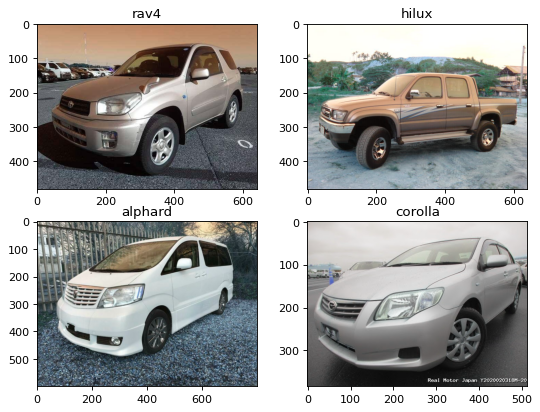

In [11]:
rav4 = random.choice(car_dict['rav4'])
hilux = random.choice(car_dict['hilux'])
alphard = random.choice(car_dict['alphard'])
corolla = random.choice(car_dict['corolla'])


rav4 = cv2.imread(rav4)
hilux = cv2.imread(hilux)
alphard = cv2.imread(alphard)
corolla = cv2.imread(corolla)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.subplot(2,2,1)
plt.title("rav4")
plt.imshow(rav4)


plt.subplot(2,2,2)
plt.title("hilux")
plt.imshow(hilux)

plt.subplot(2,2,3)
plt.title("alphard")
plt.imshow(alphard)

plt.subplot(2,2,4)
plt.title("corolla")
plt.imshow(corolla)

plt.show()


In [12]:
target_img_size = (256,256)


In [13]:
from tqdm import tqdm
train_X = []
train_Y = []

for key,value in car_dict.items():
  print(key)
  for car_img_path in tqdm(value):
    car_img= cv2.imread(car_img_path)
    if car_img is None:
      continue
    resized_car_img = cv2.resize(car_img,target_img_size)
    train_X.append(resized_car_img)
    temp = [key]
    train_Y.append(temp)


alphard


100%|█████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:08<00:00, 129.46it/s]


corolla


100%|█████████████████████████████████████████████████████████████████████████████| 1083/1083 [00:09<00:00, 116.20it/s]


crown


100%|█████████████████████████████████████████████████████████████████████████████| 1165/1165 [00:08<00:00, 129.94it/s]


hilux


100%|█████████████████████████████████████████████████████████████████████████████| 1101/1101 [00:10<00:00, 107.59it/s]


rav4


100%|█████████████████████████████████████████████████████████████████████████████| 1191/1191 [00:11<00:00, 103.84it/s]


In [14]:
from tqdm import tqdm
test_X = []
test_Y = []

for key,value in car_dict_test.items():
  print(key)
  for car_img_path in tqdm(value):
    car_img= cv2.imread(car_img_path)
    if car_img is None:
      continue
    resized_car_img = cv2.resize(car_img,target_img_size)
    test_X.append(resized_car_img)
    temp = [key]
    test_Y.append(temp)

alphard


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 229.57it/s]


corolla


100%|█████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 191.58it/s]


crown


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 254.88it/s]


hilux


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 245.10it/s]


rav4


100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 255.81it/s]


## Convert to onehot encoder

In [15]:
print("train X : ",len(train_X))
print("train Y : ",len(train_Y))

train X :  5641
train Y :  5641


In [16]:
print("test X : ",len(test_X))
print("test Y : ",len(test_Y))

test X :  206
test Y :  206


In [18]:
print(train_X[0].shape)
print(train_Y[0])


(256, 256, 3)
['alphard']


In [19]:
print(test_X[0].shape)
print(test_Y[0])


(256, 256, 3)
['alphard']


In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


In [35]:
transformed = ohe.fit_transform(train_Y)
onehot_train_Y = transformed.toarray()
train_X = np.array(train_X)


transformed = ohe.fit_transform(test_Y)
onehot_test_Y = transformed.toarray()
test_X = np.array(test_X)

In [36]:
print(train_X.shape)
print(onehot_test_Y)

(5641, 256, 256, 3)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [37]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout


input_shape = (256, 256, 3)
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same',input_shape = input_shape),
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2)),
   
    
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation = 'relu'),

    Dense(5,activation = 'softmax')   
])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

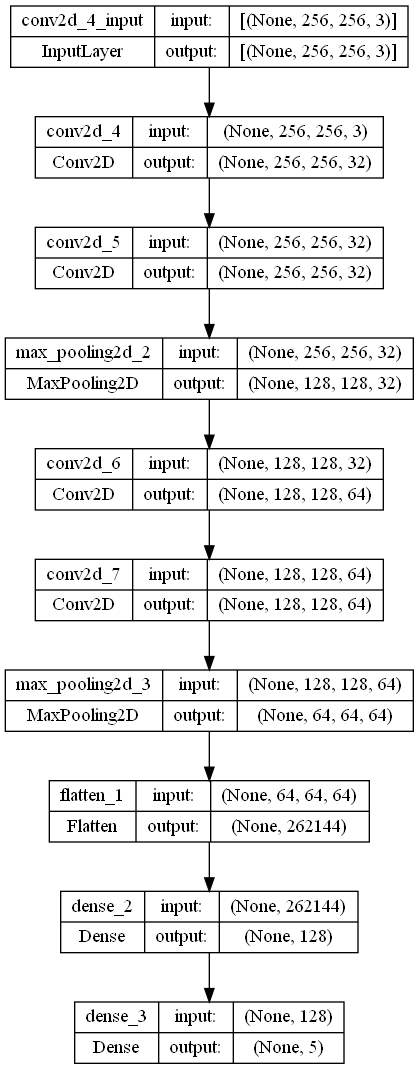

In [38]:
model.summary()
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [39]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

C:\Users\tharh\anaconda3\envs\tharhtet\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
histroy = model.fit(
    x = np.array(train_X),
    y = onehot_train_Y,
    validation_data = (test_X,onehot_test_Y),
    batch_size=16,
    epochs=10,
    verbose=1

)

Epoch 1/10
353/353 [==============================] - 17s 47ms/step - loss: 15.9843 - accuracy: 0.2854 - val_loss: 1.3143 - val_accuracy: 0.4175
Epoch 2/10
353/353 [==============================] - 16s 46ms/step - loss: 1.0267 - accuracy: 0.6139 - val_loss: 0.6971 - val_accuracy: 0.7087
Epoch 3/10
353/353 [==============================] - 16s 46ms/step - loss: 0.3520 - accuracy: 0.8841 - val_loss: 0.1754 - val_accuracy: 0.9417
Epoch 4/10
353/353 [==============================] - 16s 46ms/step - loss: 0.0953 - accuracy: 0.9768 - val_loss: 0.0507 - val_accuracy: 0.9903
Epoch 5/10
353/353 [==============================] - 16s 46ms/step - loss: 0.0493 - accuracy: 0.9879 - val_loss: 0.0600 - val_accuracy: 0.9854
Epoch 6/10
353/353 [==============================] - 16s 46ms/step - loss: 0.0506 - accuracy: 0.9885 - val_loss: 0.0984 - val_accuracy: 0.9709
Epoch 7/10
353/353 [==============================] - 16s 46ms/step - loss: 0.0940 - accuracy: 0.9805 - val_loss: 0.0738 - val_accuracy

{'loss': [15.984310150146484,
  1.0266824960708618,
  0.3519822359085083,
  0.09531796723604202,
  0.04934878647327423,
  0.05057235062122345,
  0.0940273255109787,
  0.03452630713582039,
  0.017098963260650635,
  0.04190230369567871],
 'accuracy': [0.2854103744029999,
  0.6138982176780701,
  0.8840631246566772,
  0.976777195930481,
  0.9879453778266907,
  0.9884772300720215,
  0.9804999232292175,
  0.9932636022567749,
  0.9973409175872803,
  0.9906045198440552],
 'val_loss': [1.3143372535705566,
  0.6971338391304016,
  0.17537935078144073,
  0.050695136189460754,
  0.060017477720975876,
  0.09836778044700623,
  0.07381840795278549,
  0.06873772293329239,
  0.058011215180158615,
  0.014758075587451458],
 'val_accuracy': [0.41747573018074036,
  0.708737850189209,
  0.9417475461959839,
  0.9902912378311157,
  0.9854369163513184,
  0.9708737730979919,
  0.9854369163513184,
  0.9951456189155579,
  0.9902912378311157,
  0.9951456189155579]}

In [56]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

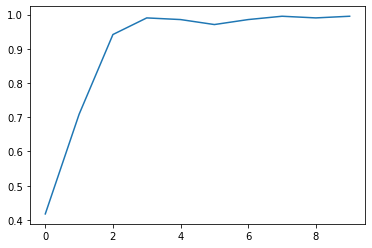

In [59]:
plt.plot(val_acc)

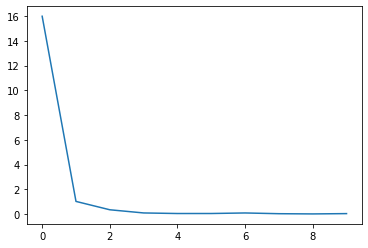

In [60]:
plt.plot(loss)

In [61]:
model.save("24_08_2022.h5")

alphard : 59
corolla : 64
crown : 25
hilux : 25
rav4 : 33

In [100]:
keyMap = {0:"alphard",
          1:"corolla",
        2:"crown",
          3:"hilux",
         4 :"rav4"}

In [131]:
def predict_img(img_path):
    print(img_path)
    img= cv2.imread(img_path)
    print(img.shape)
    img= cv2.resize(img,(256,256))
    plt.imshow(img)
    img = np.array([img])
    print(img.shape)
    result = model.predict(img,batch_size =1)
    
    index = (np.argmax(result))
    return keyMap[index]

E:\deep_learning\car_classification\25_4_2020\final_dataset_4/test/crown/crown_19.jpg
(250, 300, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 14ms/step


'crown'

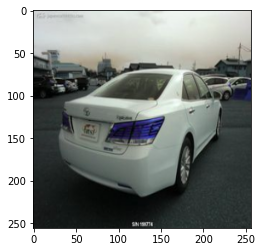

In [138]:
import random
random_path = random.choice(car_dict_test["crown"])
predict_img(random_path)

D:\test_1\test_car.png
(153, 330, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 13ms/step


'corolla'

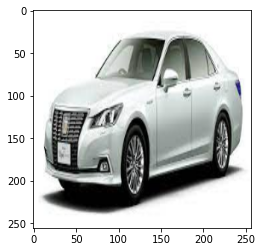

In [139]:
test_path = r"D:\test_1\test_car.png"
predict_img(test_path)